In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder

!pip install gurobipy>=10
import gurobipy as gp
from gurobipy import GRB

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
df=pd.read_csv('gdrive/My Drive/management_science/housing.csv')

Mounted at /content/gdrive


In [ ]:
df.shape

(20640, 10)

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [ ]:
# total bedroom缺值
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df = df.dropna()

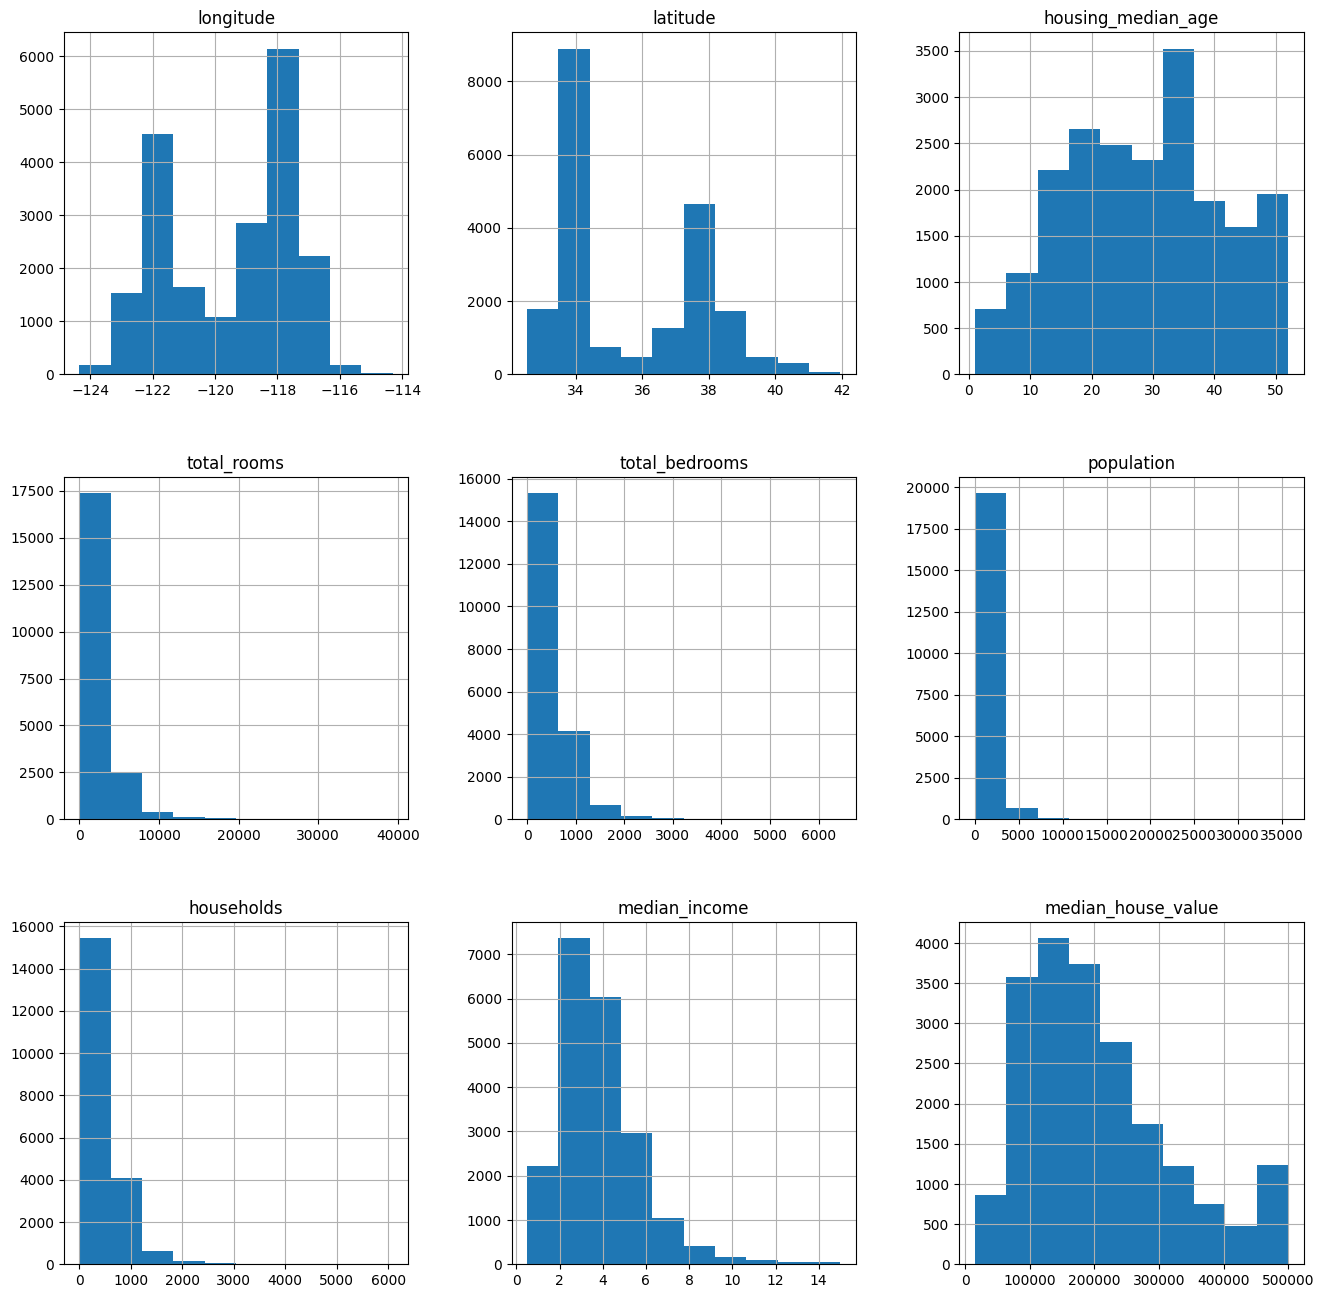

In [ ]:
df.hist(figsize=(16, 16));

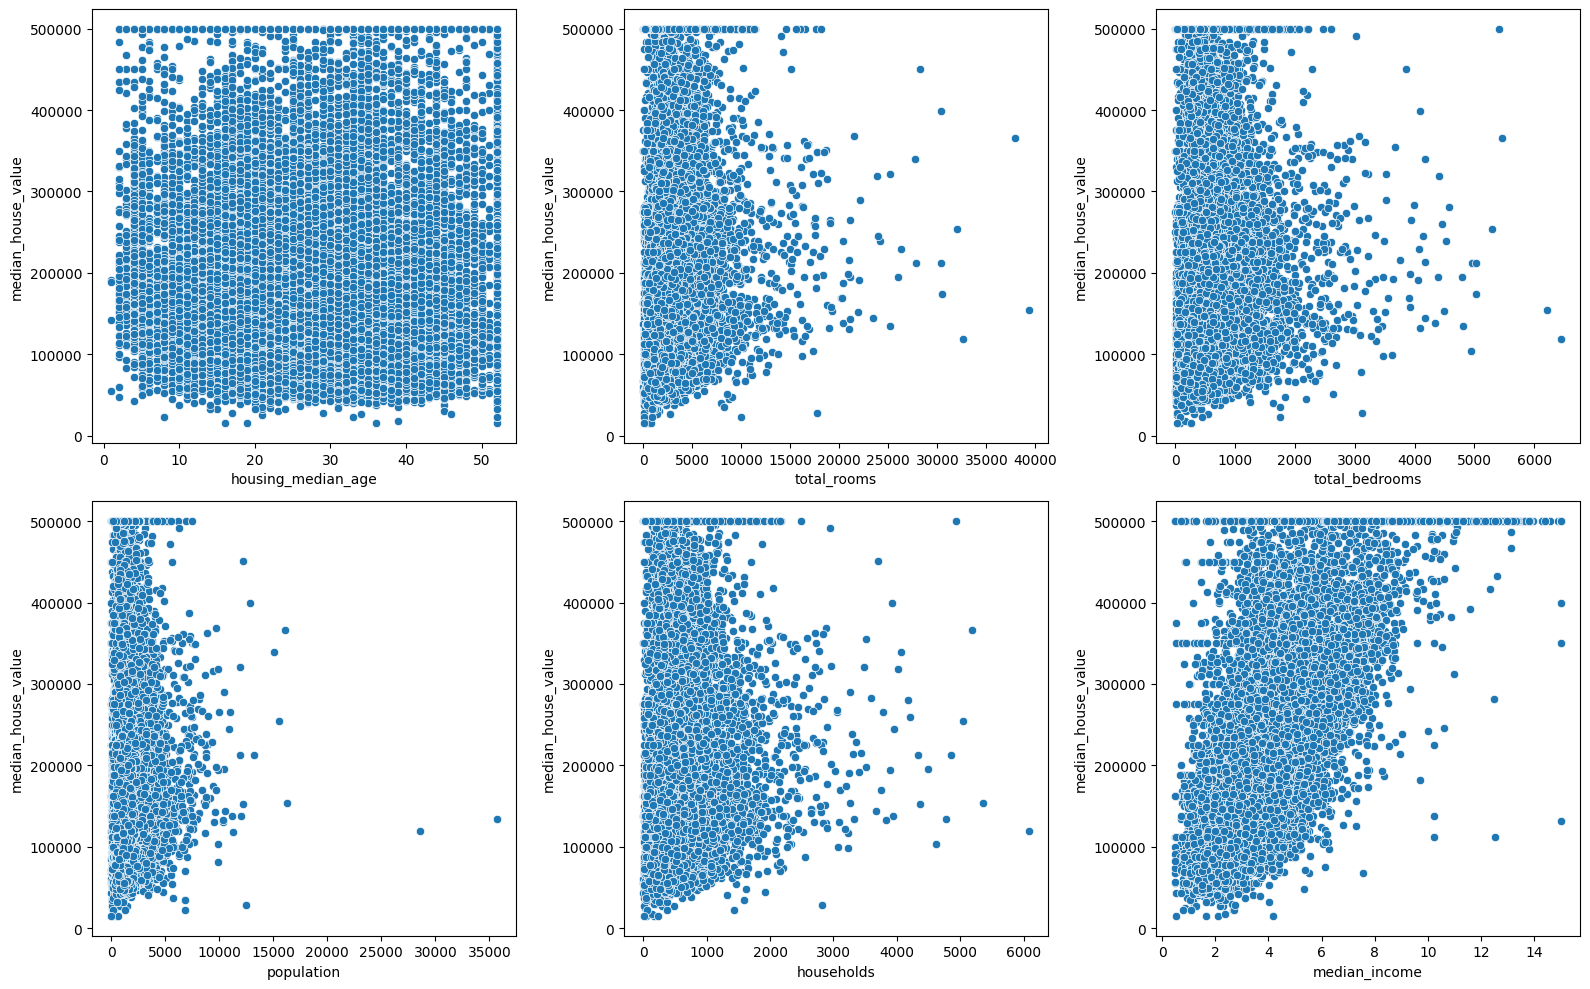

In [ ]:
# 找極端值 outliers
figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10))

sns.scatterplot(data=df, x='housing_median_age', y='median_house_value', ax=axes[0][0]);
sns.scatterplot(data=df, x='total_rooms', y='median_house_value', ax=axes[0][1]);
sns.scatterplot(data=df, x='total_bedrooms', y='median_house_value', ax=axes[0][2]);
sns.scatterplot(data=df, x='population', y='median_house_value', ax=axes[1][0]);
sns.scatterplot(data=df, x='households', y='median_house_value', ax=axes[1][1]);
sns.scatterplot(data=df, x='median_income', y='median_house_value', ax=axes[1][2]);
plt.tight_layout()
# 看圖說故事
# total_rooms極端值大約是20000以上
# total_bedrooms大約是3800以上
# population大約是12000以上
# households大約是3000以上

In [ ]:
# 刪掉極端值
df = df.loc[(df.total_rooms <= 20000) &
                      (df.total_bedrooms <= 3800) &
                      (df.population <= 12000)  &
                      (df.households <= 3000)]

In [ ]:
# 看一下刪掉極端值還有幾筆資料
df.shape
# 剩20379筆

(20379, 10)

In [ ]:
# 生成一欄：bedroom佔房間總數的比例
df['bedroom_percentage'] = df.total_bedrooms / df.total_rooms

<ipython-input-13-e1c117e39c1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bedroom_percentage'] = df.total_bedrooms / df.total_rooms


In [ ]:
ss = StandardScaler()
rs = RobustScaler()

# 一般用standart scaler
cols = ['longitude', 'latitude', 'housing_median_age']
df[cols] = ss.fit_transform(df[cols])

# 有很多極端值的用robust scaler
cols = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
df[cols] = rs.fit_transform(df[cols])

<ipython-input-14-a7811e40b9f2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = ss.fit_transform(df[cols])
<ipython-input-14-a7811e40b9f2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = rs.fit_transform(df[cols])


In [ ]:
le = LabelEncoder()
df.ocean_proximity = le.fit_transform(df.ocean_proximity)

<ipython-input-15-568602558831>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ocean_proximity = le.fit_transform(df.ocean_proximity)


In [ ]:
x = df.drop(columns=['median_house_value','total_bedrooms'])
y = df.median_house_value

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [ ]:
lr = LinearRegression(fit_intercept=True)
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# 看一下用了全部feature的Linear Regression準不準
score = lr.score(x_test, y_test)
print('Score: ', score)

Score:  0.6654808607029031


In [ ]:
lr_predict = lr.predict(x_test)

In [ ]:
# Lasso with 5 fold cross-validation
# 找alpha
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(x_train, y_train)
alp = model.alpha_
print(alp)

68.46820577987467


In [ ]:
lasso = Lasso(alpha=alp)
lasso.fit(x_train, y_train)
print(lasso.score(x_test, y_test))

0.6656716894638972


In [ ]:
# 預測
lasso_predict = lasso.predict(x_test)

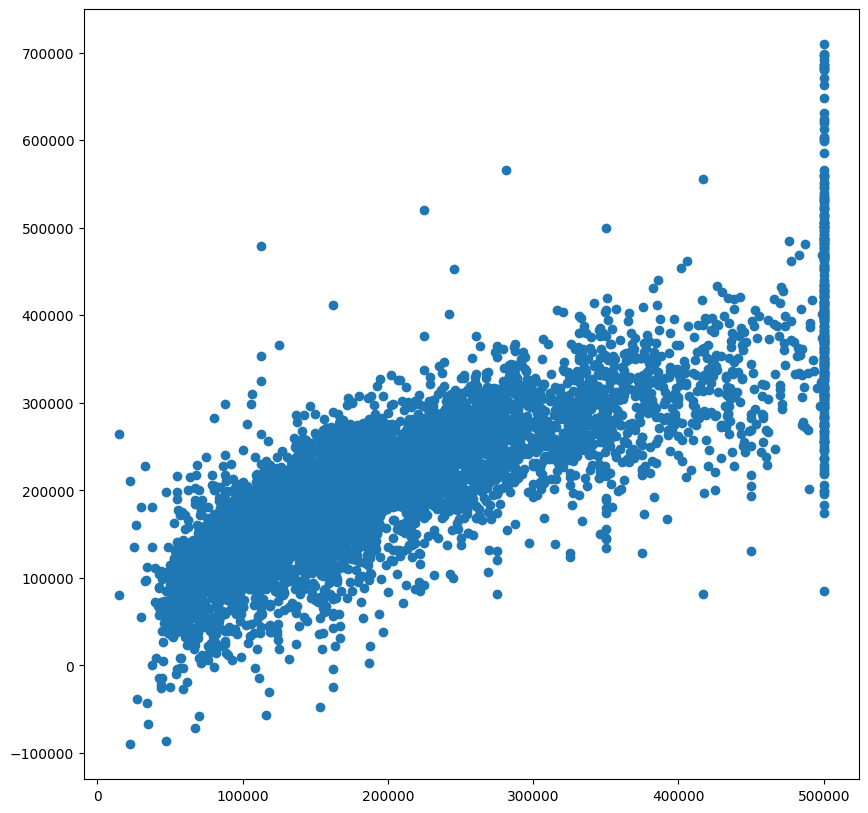

In [ ]:
# lasso valid data和預測值的關係，理想是更貼近y=x的斜直線
plt.figure(figsize=(10,10))
plt.scatter(y_test, lasso_predict)

In [ ]:
def miqp(features, response, non_zero, verbose=False):
    """
    Deploy and optimize the MIQP formulation of L0-Regression.
    """
    assert isinstance(non_zero, (int, np.integer))
    regressor = gp.Model()
    samples, dim = features.shape
    assert samples == response.shape[0]
    assert non_zero <= dim

    # Append a column of ones to the feature matrix to account for the y-intercept
    X = np.concatenate([features, np.ones((samples, 1))], axis=1)

    # Decision variables
    norm_0 = regressor.addVar(lb=non_zero, ub=non_zero, name="norm")
    beta = regressor.addMVar((dim + 1,), lb=-GRB.INFINITY, name="beta") # Weights
    intercept = beta[dim] # Last decision variable captures the y-intercept

    regressor.setObjective(beta.T @ X.T @ X @ beta
                           - 2*response.T @ X @ beta
                           + np.dot(response, response), GRB.MINIMIZE)

    # Budget constraint based on the L0-norm
    regressor.addGenConstrNorm(norm_0, beta[:-1], which=0, name="budget")

    if not verbose:
        regressor.params.OutputFlag = 0
    regressor.params.timelimit = 60
    regressor.params.mipgap = 0.001
    regressor.optimize()

    coeff = np.array([beta[i].X for i in range(dim)])
    return intercept.X, coeff
def cross_validate(features, response, non_zero, folds, standardize, seed):
    """
    Train an L0-Regression for each fold and report the cross-validated MSE.
    """
    if seed is not None:
        np.random.seed(seed)
    samples, dim = features.shape
    assert samples == response.shape[0]
    fold_size = int(np.ceil(samples / folds))
    # Randomly assign each sample to a fold
    shuffled = np.random.choice(samples, samples, replace=False)
    mse_cv = 0
    # Exclude folds from training, one at a time,
    #to get out-of-sample estimates of the MSE
    for fold in range(folds):
        idx = shuffled[fold * fold_size : min((fold + 1) * fold_size, samples)]
        train_mask = np.ones(samples, dtype=bool)
        train_mask[idx] = False
        xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3)
        if standardize:
            scaler = StandardScaler()
            scaler.fit(xtrain)
            xtrain = scaler.transform(xtrain)
            xtest = scaler.transform(xtest)
        intercept, beta = miqp(xtrain, ytrain, non_zero)
        ypred = np.dot(xtest, beta) + intercept
        mse_cv += mean_squared_error(ytest, ypred) / folds
    # Report the average out-of-sample MSE
    return mse_cv

def L0_regression(features, response, folds=5, standardize=False, seed=None):
    """
    Select the best L0-Regression model by performing grid search on the budget.
    """
    dim = features.shape[1]
    best_mse = np.inf
    best = 0
    # Grid search to find best number of features to consider
    for i in range(1, dim + 1):
        val = cross_validate(features, response, i, folds=folds,
                             standardize=standardize, seed=seed)
        if val < best_mse:
            best_mse = val
            best = i
    if standardize:
        scaler = StandardScaler()
        scaler.fit(features)
        features = scaler.transform(features)
    intercept, beta = miqp(features, response, best)
    return intercept, beta

In [ ]:
intercept, beta = L0_regression(x_train, y_train, seed=10101)

Restricted license - for non-production use only - expires 2024-10-28


In [ ]:
l0_predict = np.dot(x_test, beta) + intercept

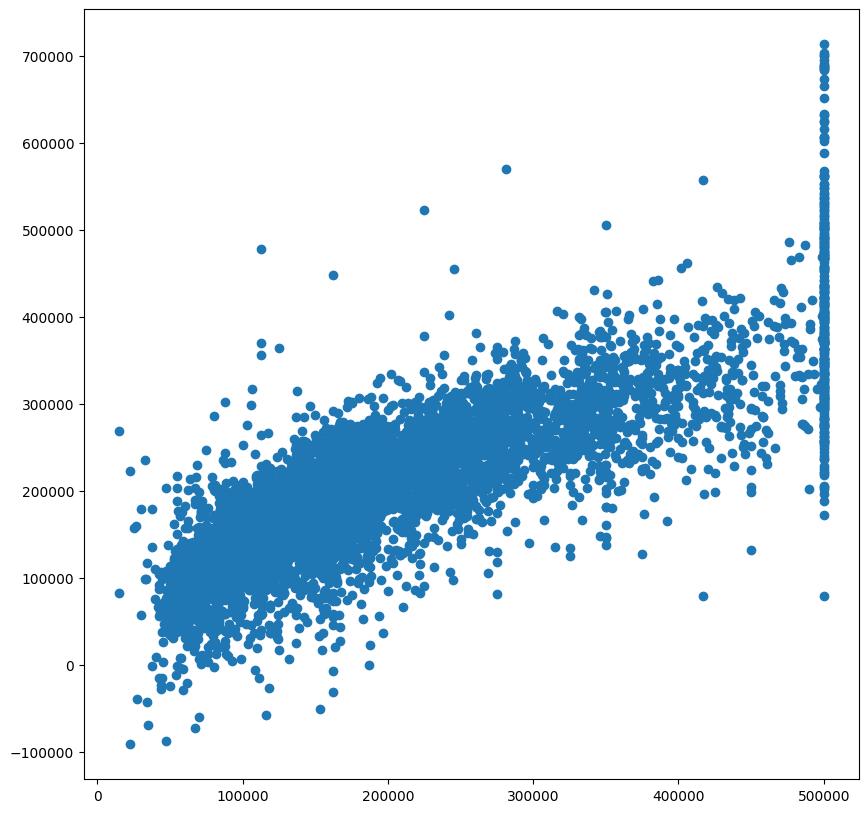

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, l0_predict)

In [ ]:
def get_evaluation(y, y_pred):
    n = len(y)
    mae = mean_absolute_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return mae, mape, mse

In [ ]:
# Linear Regression、Lasso、L0比較，差不多差不多啦，Lasso是有好一點
pd.DataFrame([
              get_evaluation(y_test, lr_predict),
              get_evaluation(y_test, lasso_predict),
              get_evaluation(y_tes  t, l0_predict),
             ],
    columns=['MAE', 'MAPE', 'MSE'],
    index=['Linear Regression', 'Lasso Regression', 'L0 Regression']),

SyntaxError: ignored